# **Modelos de clasificación**

En esta práctica, haremos un recorrido por dos modelos clásicos de clasificación: `árbol de decisión` y `vecinos más cercanos`.

Para abordar estos modelos, estaremos trabajando con un dataset clásico: `Iris`. [Aquí](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html?highlight=iris) podrán encontrar más información respecto a cómo se compone este conjunto de datos.

Scikit-Learn ya trae algunos datasets integrados. Para ello, debemos importarlos desde el módulo *sklearn.datasets*.

In [1]:
# Importamos las librerías que estaremos utilizando

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargamos el dataset de Iris

from sklearn.datasets import load_iris
iris = load_iris()

Si imprimen la variable "iris", podrán observar que no tiene una estructura de DataFrame. Para ello, debemos convertirla con la libería Pandas.

In [3]:
data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


*Ahora tenemos nuestro dataset Iris expresado en una estructura DataFrame de Pandas.*

### `Pairplot`

En esta instancia, emplearemos un paso fundamental dentro de todo **EDA** que nos muestra todas las relaciones entre las variables cuantitativas del dataframe que estemos trabajando. La importancia de este paso radica en que nos permite elegir las mejores variables predictoras para nuestro modelo. Si queremos predecir la variedad de una flor, lo más racional sería seleccionar aquellos atributos que tengan una mayor incidencia en que una flor pertenezca a una u otra categoría.

Como se desprende de lo comentado, este paso es condición _sine qua non_ en cualquier **Análisis Exploratorio de Datos** que emprendan.

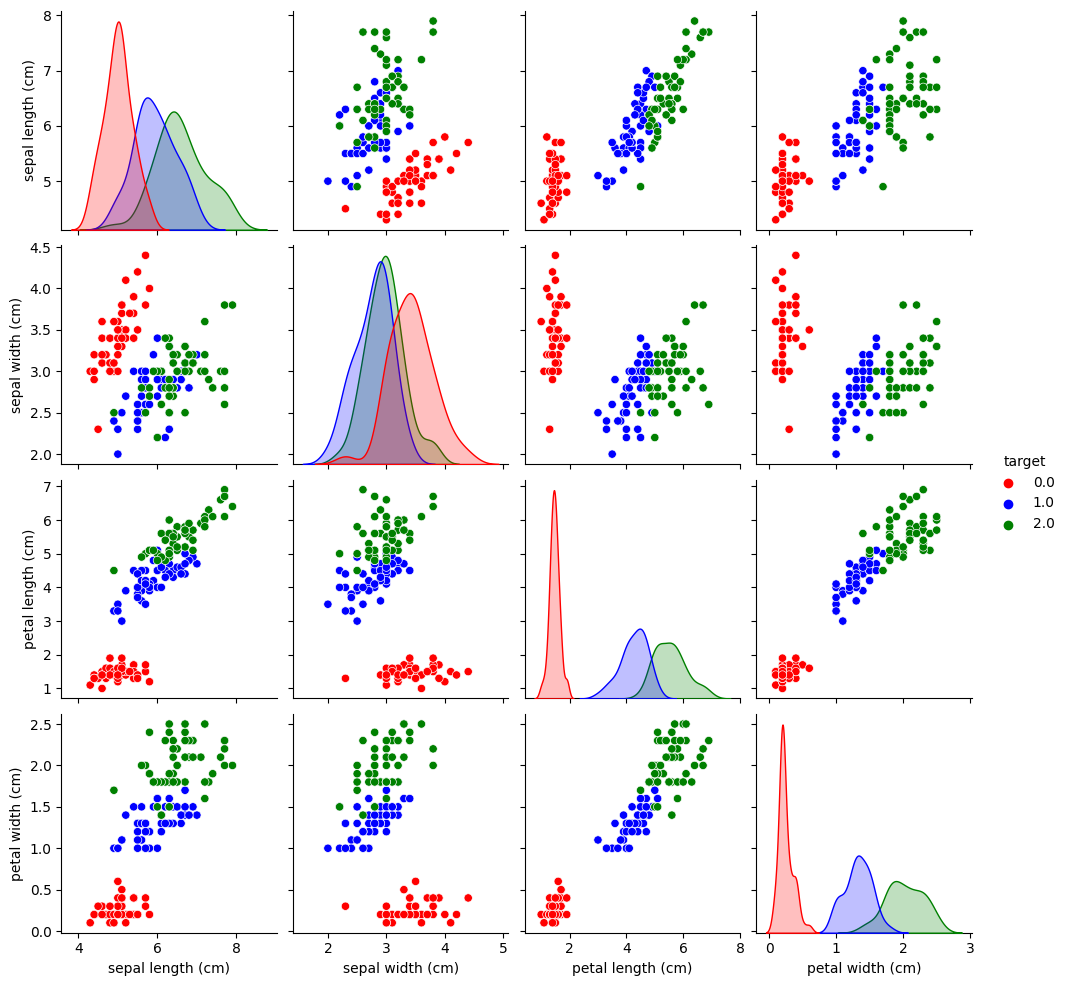

In [4]:
sns.pairplot(data, hue="target", palette = ['r', 'b', 'g'])
plt.show()

Separamos del dataframe dos atributos y las etiquetas. Llamaremos **`X`** a los features e **`y`** a las etiquetas.

Eligiremos dos atributos: *petal length* y *petal width*. Estos parecen tener un gran poder predictor para separar las clases correctamente. Luego de correr todo el notebook, y prestar atención al funcionamiento del modelo de Machine Learning, recomendamos que repitan el proceso con otros dos atributos de su elección para que corroboren la influencia que tiene la selección de variables predictoras en el funcionamiento de un modelo.

In [5]:
X = data[['petal length (cm)', 'petal width (cm)']]  # Denotamos X con mayúscula ya que 
                                                     # incluye más de un atributo
y = data.target # Etiqueta a predecir

In [6]:
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [7]:
y.tail()

145    2.0
146    2.0
147    2.0
148    2.0
149    2.0
Name: target, dtype: float64

## **1. Árbol de decisión**

Ahora que tenemos nuestras variables predictoras `X`, por un lado, y nuestra varible a predecir `y`, por el otro, vamos a crear un modelo de árbol de decisión.

Recordemos el flujo de trabajo de ML en Scikit-Learn: creamos el modelo / entrenamos / predecimos.

In [8]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = 3, random_state = 42) 

Notar que establecimos max_depth en 3. 

Esto es un `hiperparámtro` que define la profundidad que tendrá nuestro árbol, es decir, cuántos niveles de preguntas hará hasta que llegue a una hoja donde asigne una etiqueta.

A continuación, esquematizamos la profundidad de un árbol:


<img src="..\_src\assets\profundidad_arbol.png">

A, B, C, etc. representan las preguntas que va haciendo el árbol en cada subdivisión por sus ramas. En efecto, cada vez que baja un nivel, aumenta su profundidad.

**Para facilitar la comprensión de este noteebok, omitiremos la separación de nuestro dataset en set de entrenamiento/set de testeo.**

In [9]:
# Entrenamos el modelo

clf.fit(X.values,y.values)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [10]:
# Exploramos algunas de las características del modelo entrenado. Para pensar, 
# ¿qúe representa cada uno de estos valores?

print(clf.classes_)
print(clf.n_classes_)
print(clf.max_features_)
print(clf.feature_importances_)

[0. 1. 2.]
3
2
[0.58561555 0.41438445]


In [11]:
# Predecimos

y_pred = clf.predict(X.values)

Ahora **evaluaremos** nuestro modelo de clasificación. No te preocupes, la próxima clase veremos más en profundiad cada una de las métricas existentes para los problemas de clasificación. Un adelanto: existe algo llamado matriz de confusión, que tiene una serie de métricas muy importantes, entre ellas la precisión (_acurracy_).

In [12]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y,y_pred))

0.9733333333333334


Observemos, en esta etapa, las fronteras de clasificación que estableció nuestro modelo.

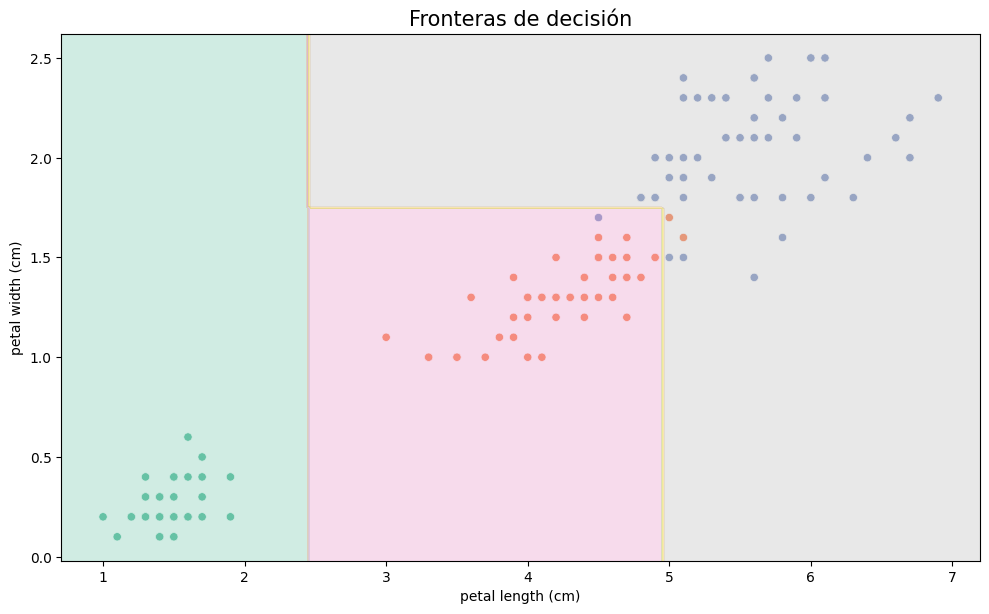

In [13]:
plt.figure(figsize= (10,6))


ax = sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1], hue= y, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
plt.title('Fronteras de decisión', fontsize= 15)
plt.show()

*Probá  modificar la profundiad del árbol para analizar su impacto en el establecimiento de las fronteras de decisión por parte de nuestor clasificador.*

 A priori, si aumentaras su profundidad, ¿pensás que será más o menos preciso? ¿Se ajustará más o menos a los datos?

### Visualizamos el árbol de decisión

In [14]:
from sklearn import tree

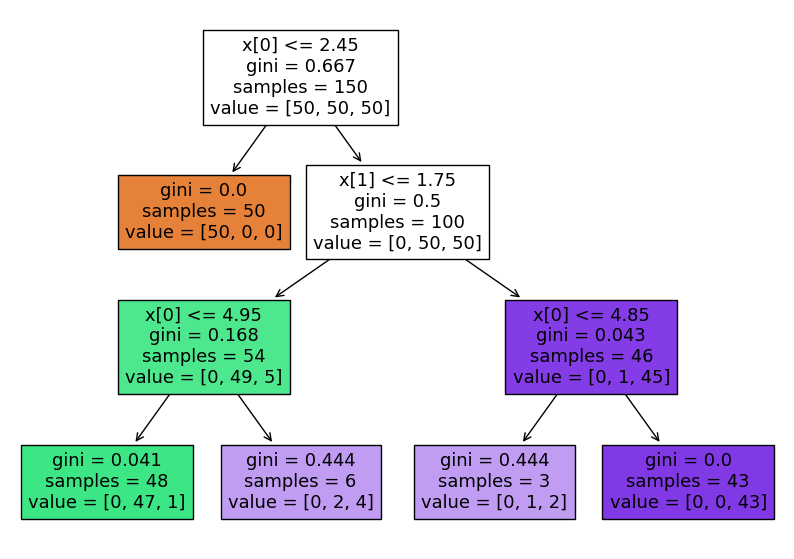

In [15]:
plt.figure(figsize = (10,7))
tree.plot_tree(clf, filled = True)
plt.show()

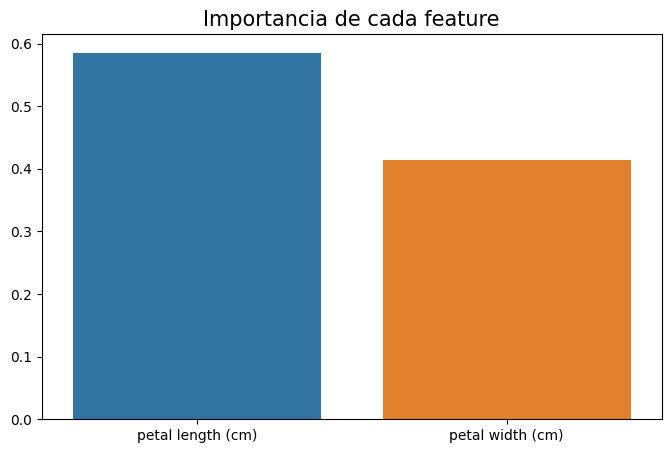

In [16]:
# Ploteamos la importancia de los atributos elegidos a la hora de hacer la predicción


plt.figure(figsize = (8,5))

importances = clf.feature_importances_
columns = X.columns
sns.barplot(x = columns, y = importances)
plt.title('Importancia de cada feature', fontsize = 15)
plt.show()

## **2. Vecinos más cercanos**

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos un objeto de la clase KNeighborsClassifier

clf = KNeighborsClassifier()

In [18]:
# Entrenamos

clf.fit(X.values,y.values)

KNeighborsClassifier()

In [19]:
# Predecimos

y_pred = clf.predict(X.values)

In [20]:
# Evaluamos

print(accuracy_score(y,y_pred))

0.96


Observermos, en esta etapa, las fronteras de clasificación que fijó nuestro modelo.

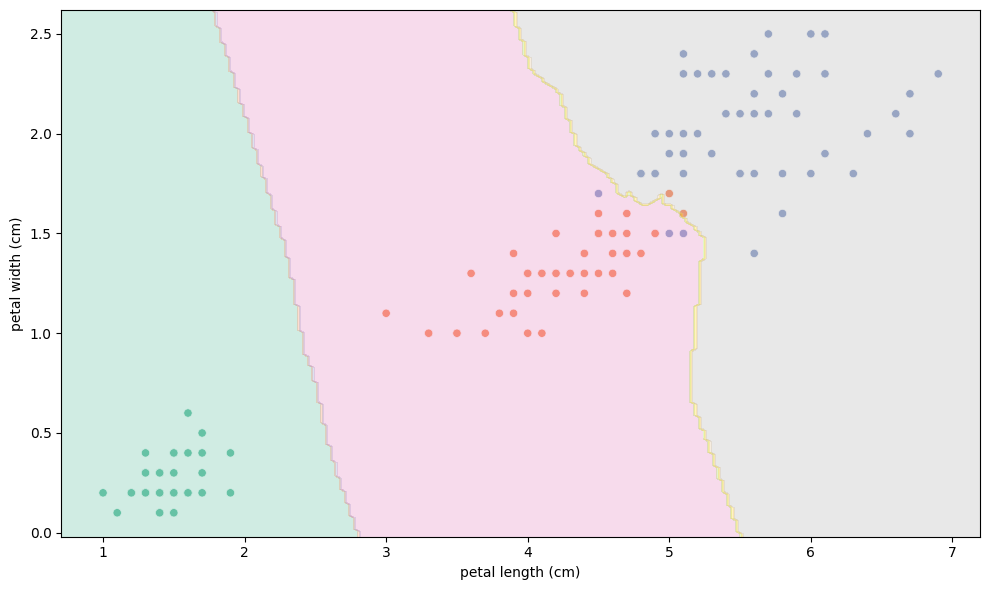

In [21]:
plt.figure(figsize= (10,6))
ax = sns.scatterplot(x = X.iloc[:,0], y = X.iloc[:,1], hue=y, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
# plt.savefig('arbol_iris.png', dpi = 400)
plt.show()

*Probá  modificar la cantidad de vecinos **k** para analizar su impacto en el establecimiento de las fronteras de decisión por parte de nuestro clasificador.*

Para ello, averiguar sobre el hiperparámetro `n_neighbors` de KNeighborsClassifier. [Aquí](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) les dejamos la documentación.